###  Installing libs
-  Versions in this tutorial:
```
!pip install numpy==2.2.5
!pip install pandas==2.2.1
!pip install matplotlib==3.10.0
!pip install scikit-learn==1.6.1
```

### Importing dependencies

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the California housing dataset

In [360]:
houses = pd.read_csv('datasets/housing-california.csv')

### Data Preprocessing

**Checking the columns and values**

In [361]:
houses.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [362]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Inspecting null values and cleaning**

In [363]:
houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [364]:
houses_cleaned = houses[houses['total_bedrooms'].notnull()]

In [365]:
houses_cleaned.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Encoding

This creates binary columns for each category of `ocean_proximity`

In [366]:
houses_cleaned = pd.get_dummies(houses_cleaned, columns=['ocean_proximity'], drop_first=True)

### Feature selection

Checking field with greater correlation with `median_house_value`

In [367]:
houses_cleaned.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_INLAND,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.484787,1.000000,-0.010681,-0.241356,-0.262289


We can observe that the biggest correlation is between `median_house_value` and `median_income` (0.688355) so these two fields will be used for training of the model

In [368]:
houses_reduced = houses_cleaned[['median_house_value', 'median_income']]
houses_reduced.head(3)

,median_house_value,median_income
0,452600.0,8.3252
1,358500.0,8.3014
2,352100.0,7.2574


Ploting the variables

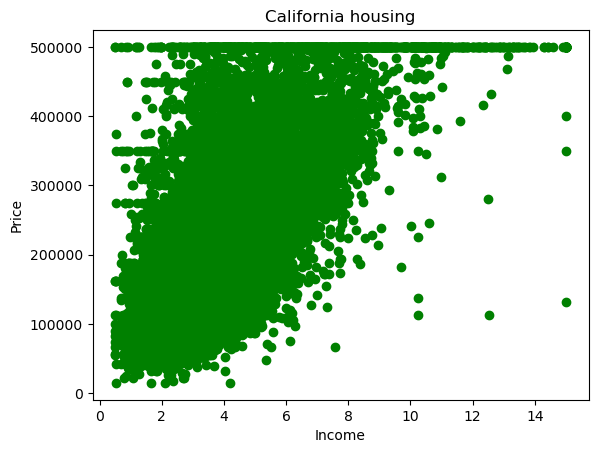

In [369]:
plt.scatter(houses_reduced['median_income'], houses_reduced['median_house_value'], color='g')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('California housing')
plt.show()

### Cleaning and removing noisy

It seems like for a almos all income values there are 500000 house value and some outliers when income is greater than 9, we will removed it for normalization 

In [370]:
houses_reduced = houses_reduced[ (houses_reduced['median_house_value'] < 500000) & (houses_reduced['median_income'] <= 9)]

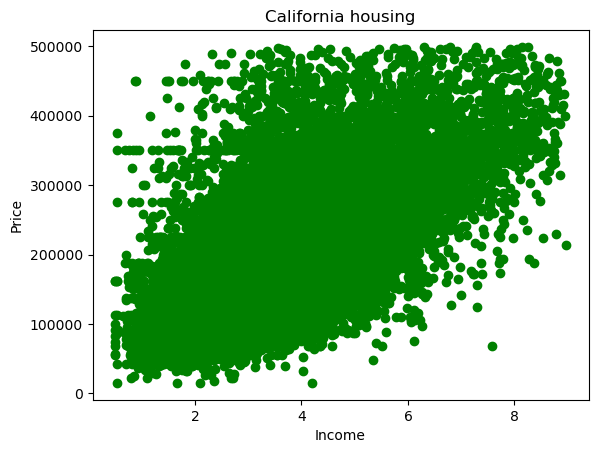

In [371]:
plt.scatter(houses_reduced['median_income'], houses_reduced['median_house_value'], color='g')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('California housing')
plt.show()

### Scaling

In [372]:
from sklearn.preprocessing import StandardScaler

X = houses_reduced['median_income'].to_numpy(); 
y = houses_reduced['median_house_value'].to_numpy(); 

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))


Ploting the variables

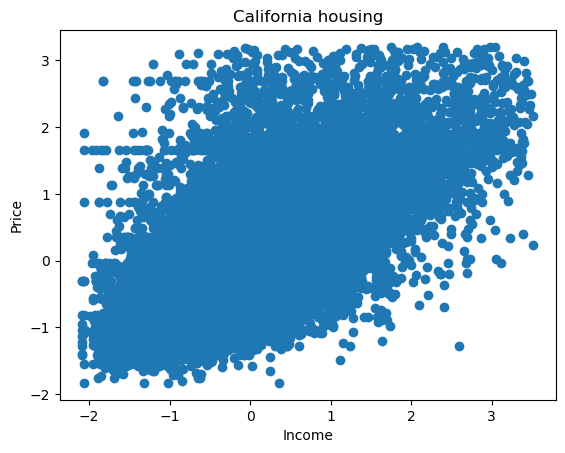

In [373]:
plt.scatter(X_scaled, y_scaled)
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('California housing')
plt.show()

### Splitting data

Splitting data for training and testing where 80% is for training and 20% for testing

In [374]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

### Training the model

In [375]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Checking the coeficient of determination and intercept

In [376]:
print(model.coef_, model.intercept_)

[[0.64276154]] [0.0024051]


### Ploting regression line

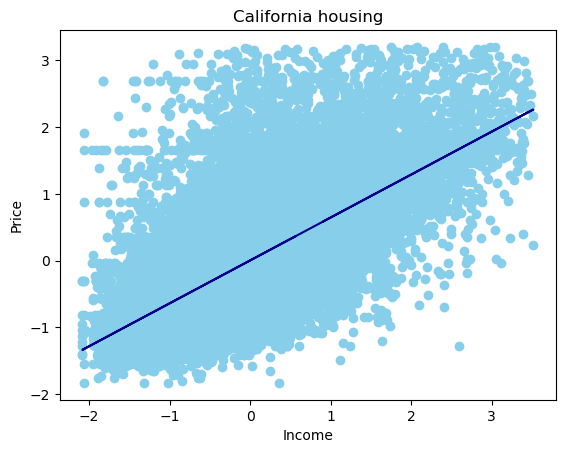

In [377]:
plt.scatter(X_scaled,y_scaled, color='skyblue')
plt.plot(X_train, model.intercept_ + model.coef_ * X_train, color='darkblue')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('California housing')
plt.show()

### Checking the model performance

#### Coeficient of determination
- The coefficient of determination, commonly known as R², measures how well a regression model explains the variation in the target variable.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [378]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test.reshape(-1,1))
r2 = r2_score(y_test, y_pred)
print("Model Accuracy:", r2)

Model Accuracy: 0.4067458775995546


The model explains about 40% of the variance in the target variable based on the input feature.

### Predicting the house value for a given income

In [379]:
new_income = np.array([[3.0]])
new_income_scaled = scaler_X.transform(new_income)

predicted_scaled = model.predict(new_income_scaled)
predicted_original = scaler_y.inverse_transform(predicted_scaled)

print(f"Predicted original house value: ${predicted_original[0][0]:,.2f}")

Predicted original house value: $164,860.56
